### **1. 비정상성 시계열 데이터 준비**

In [1]:
#코드 12-7
!pip install pydataset
from pydataset import data
data()

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
     -------------------------------------- 15.9/15.9 MB 100.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939464 sha256=5c56d5059b2c292e9aa7656d212b17adc25d8714de199e60c5d5c3bff7d9c05b
  Stored in directory: c:\users\asia\appdata\local\pip\cache\wheels\4c\82\ad\f04abc617222b10438b1285ab9b5cfaecd180c10a7c81cff54
Successfully built pydataset
initiated datasets repo at: C:\Users\asia\.pydataset/


,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [2]:
#코드 12-8
air = data('AirPassengers')
data('AirPassengers', show_doc=True)

AirPassengers

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Airline Passenger Numbers 1949-1960

### Description

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

### Usage

    AirPassengers

### Format

A monthly time series, in thousands.

### Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis,
Forecasting and Control._ Third Edition. Holden-Day. Series G.

### Examples

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)
    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24)
    tl <- pred$pred - 1.96 * pred$se
    tu <- pred$pred + 1.96 * pred$se
    ts.plot(

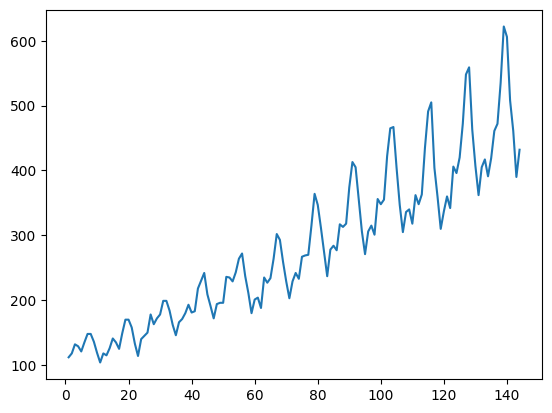

In [4]:
#코드 12-9
import matplotlib.pyplot as plt
data = air['AirPassengers']
plt.plot(data)
plt.show()

In [5]:
#코드 12-10
from statsmodels.tsa.stattools import adfuller

print('ADF test with AirPassengers time-series')
ADF_result = adfuller(data)
#ADF 통계량
print('ADF Stats: %f' % ADF_result[0])
#p-값
print('p-value: %f' % ADF_result[1])
#임계값
print('Critical values:' )
for key, value in ADF_result[4].items():
  print('\t%s: %.4f' % (key, value))

ADF test with AirPassengers time-series
ADF Stats: 0.815369
p-value: 0.991880
Critical values:
	1%: -3.4817
	5%: -2.8840
	10%: -2.5788


In [6]:
#코드 12-11
from statsmodels.tsa.stattools import kpss

print('KPSS test with AirPassengers time-series')
KPSS_result = kpss(data)
#KPSS 통계량
print('KPSS Stats: %f' % KPSS_result[0])
#p-값
print('p-value: %f' % KPSS_result[1])
#임계값
print('Critical values:' )
for key, value in KPSS_result[3].items():
  print('\t%s: %.4f' % (key, value))

KPSS test with AirPassengers time-series
KPSS Stats: 1.651312
p-value: 0.010000
Critical values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390


C:\Users\asia\AppData\Local\Temp\ipykernel_16528\3199800606.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_result = kpss(data)


### **2. 데이터 정상성 확보**

In [ ]:
#코드 12-12 분산 안전화
import numpy as np
df_log_air = np.log(air['AirPassengers'])
df_log_air.head()

1    4.718499
2    4.770685
3    4.882802
4    4.859812
5    4.795791
Name: AirPassengers, dtype: float64

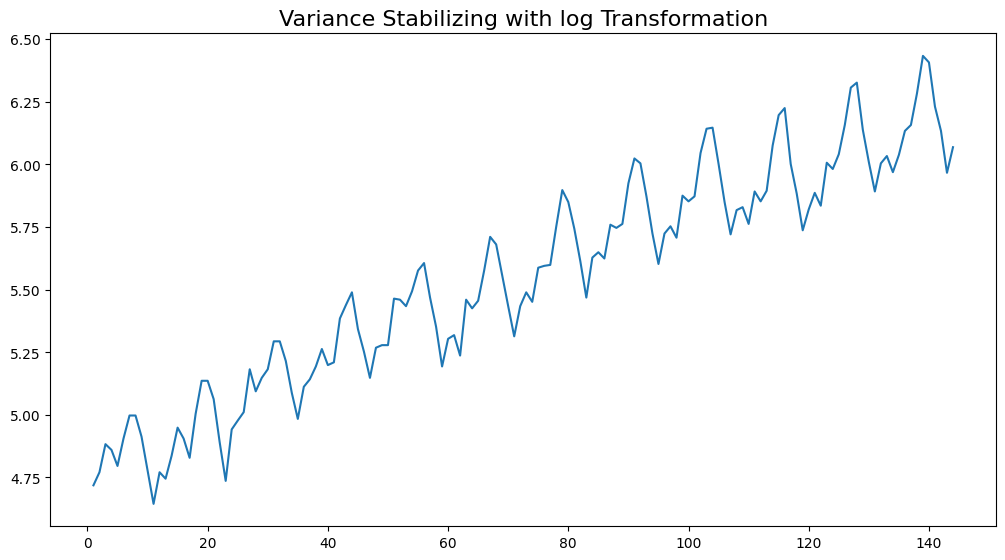

In [8]:
#코드 12-13
df_log_air.plot(figsize=(12.2, 6.4))
plt.title('Variance Stabilizing with log Transformation', fontsize=16)
plt.show()

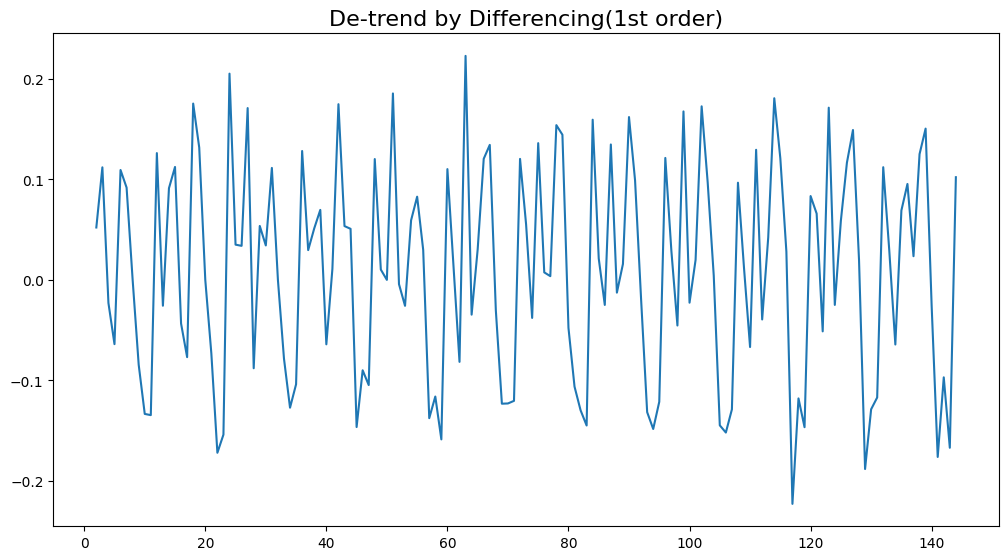

In [9]:
#코드 12-14 차분을 하여 추세를 제거
df_log_air_diff = df_log_air.diff(1).dropna()

df_log_air_diff.plot(figsize=(12.2, 6.4))
plt.title('De-trend by Differencing(1st order)', fontsize=16)
plt.show()

In [10]:
#코드 12-15
print('ADF test with AirPassengers time-series')
ADF_result_diff = adfuller(df_log_air_diff)

print('ADF Stats: %f' % ADF_result_diff[0])
print('p-value: %f' % ADF_result_diff[1])
print('Critical values:' )
for key, value in ADF_result_diff[4].items():
  print('\t%s: %.4f' % (key, value))

ADF test with AirPassengers time-series
ADF Stats: -2.717131
p-value: 0.071121
Critical values:
	1%: -3.4825
	5%: -2.8844
	10%: -2.5790


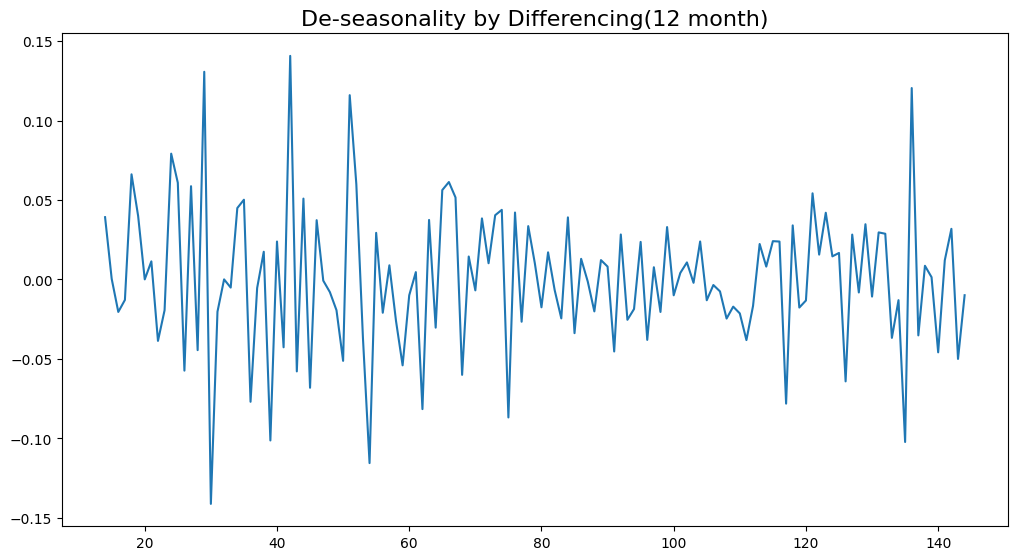

In [13]:
#코드 12-16
df_log_air_diff_season = df_log_air_diff.diff(12).dropna()

df_log_air_diff_season.plot(figsize=(12.2, 6.4))
plt.title('De-seasonality by Differencing(12 month)', fontsize=16)
plt.show()

In [14]:
#코드 12-17
#ADF 검정
print('ADF test with AirPassengers time-series')
ADF_result_diff_season = adfuller(df_log_air_diff_season)

print('ADF Stats: %f' % ADF_result_diff_season[0])
print('p-value: %f' % ADF_result_diff_season[1])
print('Critical values:' )
for key, value in ADF_result_diff_season[4].items():
  print('\t%s: %.4f' % (key, value))

#KPSS 검정
print('KPSS test with AirPassengers time-series')
KPSS_result_diff_season = kpss(df_log_air_diff_season)
print('KPSS Stats: %f' % KPSS_result_diff_season[0])
print('p-value: %f' % KPSS_result_diff_season[1])
print('Critical values:' )
for key, value in KPSS_result_diff_season[3].items():
  print('\t%s: %.4f' % (key, value))

ADF test with AirPassengers time-series
ADF Stats: -4.443325
p-value: 0.000249
Critical values:
	1%: -3.4870
	5%: -2.8864
	10%: -2.5800
KPSS test with AirPassengers time-series
KPSS Stats: 0.073191
p-value: 0.100000
Critical values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390


C:\Users\asia\AppData\Local\Temp\ipykernel_16528\2862122725.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_result_diff_season = kpss(df_log_air_diff_season)
